# Has the network latency gone up since we switched internet service providers?

Do we need to reword the question?
Has there been a significant increase in network latency since we switched?

What are the variables?
old_isp
new_isp
network_latency

What are the variable types?
old_isp = cat/discrete
new_isp = cat/discrete
network_latency = numerical/continuous

Null hypothesis
Ho = no sig change in network latency


Alt hypothesis
Ha = sig change in network latency

True pos example
Ho is False
a sig change in network latency

True neg example
Ho is True
no sig change in network latency

Type I error:
stating Ho is True, but data shows otherwise

Type II error:
stating Ho is False, but data shows otherwise

Type of test to run?

# Is the website redesign any good?

Do we need to reword the question?
how to quantify the redesign
Has time spent on website increased significantly

What are the variables?
old_site
new_site
time_online

Variable types?
old_site = cat/discrete
new_site = cat/discrete
time_online = numerical/continuous

Null hypothesis
Ho = no sig change in time spent on site

Alt hypothesis
Ha = sig change in time spent on site

True pos example
Ho is False
a sig change in site time

True neg example
Ho is True
no sig change in site time

Type I error:
stating Ho is True, but data shows otherwise

Type II error:
stating Ho is False, but data shows otherwise

Type of test to run?

# Is our television ad driving more sales?

Do we need to reword the question?
Is the ad resulting in a sig change in sales?

What are the variables?
old_sales
new_sales

What are the variable types?
old_sales = cat/discrete
new_sales = cat/discrete

Null hypothesis
Ho = no sig change in sales


Alt hypothesis
Ha = sig change in sales

True pos example
Ho is False
a sig change in sales

True neg example
Ho is True
no sig change in sales

Type I error:
stating Ho is True, but data shows otherwise

Type II error:
stating Ho is False, but data shows otherwise

Type of test to run?

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [1]:
from math import sqrt
from scipy import stats
from scipy.stats import gmean

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
mean1 = 90
mean2 = 100

n1 = 40
n2 = 50

s1 = 15
s2 = 20

degf = n1 + n2 - 2

s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
s_p

standard_error = se = sqrt(s1**2 / n1 + s2**2 / n2)

t = (mean2 - mean1) / (s_p * sqrt(1/n1 + 1/n2))
t

2.6252287036468456

In [3]:
p = stats.t(degf).sf(t) * 2

print(f't = {t:.5f}')
print(f'p = {p:.5f}')

t = 2.62523
p = 0.01021


Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [4]:
from pydataset import data
mpg = data('mpg')

In [5]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [6]:
mpg['avg_fuel_efficiency'] = stats.gmean(mpg[['cty', 'hwy']], axis =1)

In [7]:
fuel_efficiency_1999 = mpg[mpg.year == 1999].avg_fuel_efficiency

<AxesSubplot:>

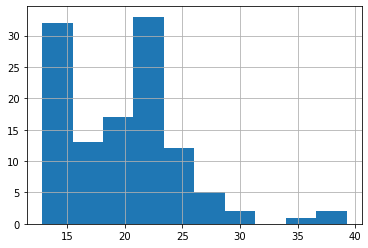

In [71]:
fuel_efficiency_1999.hist()


In [8]:
fuel_efficiency_2008 = mpg[mpg.year == 2008].avg_fuel_efficiency


<AxesSubplot:>

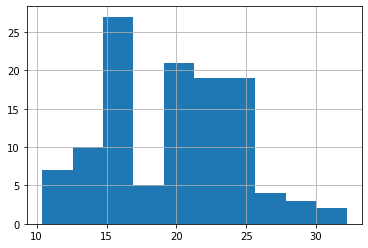

In [72]:
fuel_efficiency_2008.hist()

In [9]:
xbar1 = fuel_efficiency_1999.mean()
xbar2 = fuel_efficiency_2008.mean()

n1 = fuel_efficiency_1999.shape[0]
n2 = fuel_efficiency_2008.shape[0]

s1 = fuel_efficiency_1999.std()
s2 = fuel_efficiency_2008.std()

degf = n1 + n2 - 2

s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
s_p

standard_error = se = sqrt(s1**2 / n1 + s2**2 / n2)

t = (xbar1 - xbar2) / (s_p * sqrt(1/n1 + 1/n2))
t

0.2603101194835629

In [10]:
p = stats.t(degf).sf(t) * 2

In [11]:
p

0.7948554523834113

Are compact cars more fuel-efficient than the average car?

In [12]:
compact = mpg[mpg['class'] == 'compact'].avg_fuel_efficiency

mean = mpg.avg_fuel_efficiency.mean()
xbar = compact.mean()
s = compact.std()
n = mpg[mpg['class'] == 'compact'].shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - mean) / (s / sqrt(n))
t

7.7040928876494945

In [48]:
p = stats.t(degf).sf(t)
p/2

1.5596060499140897e-06

Do manual cars get better gas mileage than automatic cars?

In [42]:
manual_fuel_efficiency = mpg[mpg.trans.str.contains('manual')].avg_fuel_efficiency

<AxesSubplot:>

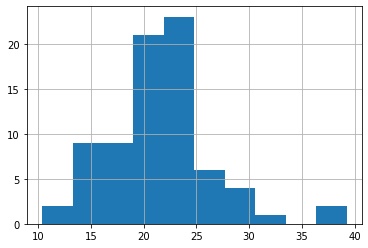

In [69]:
manual_fuel_efficiency.hist()

In [45]:
auto_fuel_efficiency = mpg[mpg.trans.str.contains('auto')].avg_fuel_efficiency

<AxesSubplot:>

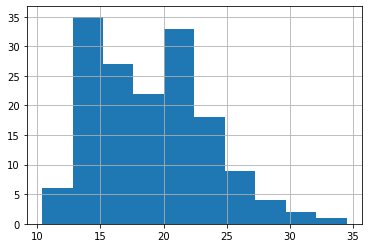

In [70]:
auto_fuel_efficiency.hist()

In [46]:
xbar1 = manual_fuel_efficiency.mean()
xbar2 = auto_fuel_efficiency.mean()

n1 = manual_fuel_efficiency.shape[0]
n2 = auto_fuel_efficiency.shape[0]

s1 = manual_fuel_efficiency.std()
s2 = auto_fuel_efficiency.std()

degf = n1 + n2 - 2

s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
s_p

standard_error = se = sqrt(s1**2 / n1 + s2**2 / n2)

t = (xbar1 - xbar2) / (s_p * sqrt(1/n1 + 1/n2))
t

4.624541901080757

In [49]:
p = stats.t(degf).sf(t) * 2
p/2

3.1192120998281794e-06

1. Use the telco_churn data. 
Does tenure correlate with monthly charges?


In [54]:
churn_df = pd.read_csv("Cust_Churn_Telco.csv")

In [74]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [61]:
churn_df = churn_df.dropna()

In [62]:
r, p = stats.pearsonr(churn_df.tenure, churn_df.MonthlyCharges)

r, p

(0.2468617666408935, 3.9898213232673846e-98)

Total charges?

In [73]:
r, p = stats.pearsonr(churn_df.tenure, churn_df.TotalCharges)
r, p

(0.825880460933202, 0.0)

What happens if you control for phone and internet service?


In [80]:
phone = churn_df['tenure'][churn_df['PhoneService'] == 'Yes']
monthly = churn_df['MonthlyCharges'][churn_df['PhoneService'] == 'Yes']
total = churn_df['TotalCharges'][churn_df['PhoneService'] == 'Yes']

In [79]:
r, p = stats.pearsonr(phone, monthly)
r, p

(0.24419396575193236, 6.82801603762022e-87)

In [81]:
r, p = stats.pearsonr(phone, total)
r, p

(0.8298393210699408, 0.0)

2. Use the employees database.

In [108]:
import pandas as pd
import numpy as np
from datetime import date
from env import host, password, username
def get_connection(db, user=username, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
url = get_connection('employees', username, host, password)


Is there a relationship between how long an employee has been with the company and their salary?

In [109]:
query = '''
SELECT
    s.emp_no as emp_no,
    s.salary as salary,
    e.hire_date as hire_date,
    s.to_date as to_date
FROM salaries as s
JOIN employees as e USING (emp_no)
'''

In [110]:
salaries_df = pd.read_sql(query, url)

In [111]:
salaries_df['to_date']= salaries_df['to_date'].replace(to_replace = salaries_df["to_date"].max(), value =date.today())

In [112]:
salaries_df['tenure'] = (salaries_df.to_date - salaries_df.hire_date)

In [113]:
salaries_df

,emp_no,salary,hire_date,to_date,tenure
0,10001,60117,1986-06-26,1987-06-26,365 days
1,10001,62102,1986-06-26,1988-06-25,730 days
2,10001,66074,1986-06-26,1989-06-25,1095 days
3,10001,66596,1986-06-26,1990-06-25,1460 days
4,10001,66961,1986-06-26,1991-06-25,1825 days
...,...,...,...,...,...
2844042,499999,63707,1997-11-30,1998-11-30,365 days
2844043,499999,67043,1997-11-30,1999-11-30,730 days
2844044,499999,70745,1997-11-30,2000-11-29,1095 days
2844045,499999,74327,1997-11-30,2001-11-29,1460 days


In [114]:
new_df = salaries_df.sort_values("to_date").groupby("emp_no").last()

In [115]:
new_df["tenure"] = new_df.tenure.astype(str)

In [116]:
new_df["tenure"] = new_df.tenure.str.strip('days').astype(int)

$H_0$: There is no linear correlation between salary and tenure.

In [117]:
r, p = stats.pearsonr( new_df.tenure, new_df.salary)
r, p

(0.32495248974383406, 0.0)

In [118]:
if p < 0.05:
    print(f' p is less than our alpha and we can reject the null hypothesis')

 p is less than our alpha and we can reject the null hypothesis


3. Use the sleepstudy data. Is there a relationship between days and reaction time

In [66]:
from pydataset import data
sleepstudy = data('sleepstudy')

In [67]:
sleepstudy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [68]:
r, p = stats.pearsonr(sleepstudy.Days, sleepstudy.Reaction)
r, p

(0.5352302262650253, 9.894096322214812e-15)

1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

 	Codeup Student	Not Codeup Student
Uses a Macbook	49	20
Doesn't Use A Macbook	1	30

Ho There is no association between using a macbook and being a codeup student
Ha There is an association between using a macbook and being a codeup student


In [92]:
alpha = 0.01
index = ['Uses a Macbook', 'Doesn\'t Use A Macbook']
columns = ['Codeup Student', 'Not Codeup Student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')


Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000


In [93]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


2. Choose another 2 categorical variables from the mpg dataset and perform a chi2
 contingency table test with them. Be sure to state your null and alternative hypotheses.



In [94]:
mpg = data('mpg')

In [103]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [95]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [96]:
mpg.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
dtype: int64

In [97]:
mpg.displ.value_counts()

2.0    21
2.5    20
4.7    17
4.0    15
1.8    14
2.4    13
4.6    11
2.8    10
3.3     9
3.0     8
5.7     8
2.7     8
3.8     8
5.4     8
3.1     6
5.3     6
2.2     6
1.6     5
5.2     5
3.5     5
3.4     4
4.2     4
3.9     3
3.7     3
1.9     3
5.0     2
6.2     2
3.6     2
5.9     2
4.4     1
5.6     1
6.5     1
7.0     1
6.0     1
6.1     1
Name: displ, dtype: int64

In [98]:
mpg.cyl.value_counts()

4    81
6    79
8    70
5     4
Name: cyl, dtype: int64

Form hypothesis:

$H_0$: Displacement and Cylinders have no association.  (They are independent)

$H_a$: Displacement and Cylinders are associated.

In [99]:
observed = pd.crosstab(mpg.displ, mpg.cyl)
observed

cyl,4,5,6,8
displ,,,,
1.6,5,0,0,0
1.8,14,0,0,0
1.9,3,0,0,0
2.0,21,0,0,0
2.2,6,0,0,0
2.4,13,0,0,0
2.5,14,4,2,0
2.7,5,0,3,0
2.8,0,0,10,0


In [100]:
alpha = 0.01
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [101]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 5  0  0  0]
 [14  0  0  0]
 [ 3  0  0  0]
 [21  0  0  0]
 [ 6  0  0  0]
 [13  0  0  0]
 [14  4  2  0]
 [ 5  0  3  0]
 [ 0  0 10  0]
 [ 0  0  8  0]
 [ 0  0  6  0]
 [ 0  0  9  0]
 [ 0  0  4  0]
 [ 0  0  5  0]
 [ 0  0  2  0]
 [ 0  0  3  0]
 [ 0  0  8  0]
 [ 0  0  3  0]
 [ 0  0 14  1]
 [ 0  0  2  2]
 [ 0  0  0  1]
 [ 0  0  0 11]
 [ 0  0  0 17]
 [ 0  0  0  2]
 [ 0  0  0  5]
 [ 0  0  0  6]
 [ 0  0  0  8]
 [ 0  0  0  1]
 [ 0  0  0  8]
 [ 0  0  0  2]
 [ 0  0  0  1]
 [ 0  0  0  1]
 [ 0  0  0  2]
 [ 0  0  0  1]
 [ 0  0  0  1]]
---
Expected

[[1 0 1 1]
 [4 0 4 4]
 [1 0 1 0]
 [7 0 7 6]
 [2 0 2 1]
 [4 0 4 3]
 [6 0 6 5]
 [2 0 2 2]
 [3 0 3 2]
 [2 0 2 2]
 [2 0 2 1]
 [3 0 3 2]
 [1 0 1 1]
 [1 0 1 1]
 [0 0 0 0]
 [1 0 1 0]
 [2 0 2 2]
 [1 0 1 0]
 [5 0 5 4]
 [1 0 1 1]
 [0 0 0 0]
 [3 0 3 3]
 [5 0 5 5]
 [0 0 0 0]
 [1 0 1 1]
 [2 0 2 1]
 [2 0 2 2]
 [0 0 0 0]
 [2 0 2 2]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
---

chi^2 = 474.1751
p     = 0.0000


In [102]:
null_hypothesis = "Displacement and Cylinders are independent"

if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")


We reject the hypothesis that Displacement and Cylinders are independent


Form hypothesis:

$H_0$: Cylinders and Highway Mileage have no association.  (They are independent)

$H_a$: Cylinders and Highway Mileage are associated.

In [104]:
observed = pd.crosstab(mpg.cyl, mpg.hwy)
observed

hwy,12,14,15,16,17,18,19,20,21,22,...,30,31,32,33,34,35,36,37,41,44
cyl,,,,,,,,,,,,,,,,,,,,,
4,0,0,0,0,0,0,0,4,0,1,...,4,7,4,2,1,2,2,1,1,2
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,13,2,7,4,1,4,...,0,0,0,0,0,0,0,0,0,0
8,5,2,10,7,18,8,6,3,1,2,...,0,0,0,0,0,0,0,0,0,0


In [105]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [106]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 0  0  0  0  0  0  0  4  0  1  1  2  5 11 10  3 18  4  7  4  2  1  2  2
   1  1  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  3  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0 13  2  7  4  1  4  3 10  8 19  4  3  1  0  0  0  0  0  0  0
   0  0  0]
 [ 5  2 10  7 18  8  6  3  1  2  3  1  2  2  0  0  0  0  0  0  0  0  0  0
   0  0  0]]
---
Expected

[[ 1  0  3  2 10  3  4  3  0  2  2  4  5 11  4  2  7  1  2  1  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 1  0  3  2 10  3  4  3  0  2  2  4  5 10  4  2  7  1  2  1  0  0  0  0
   0  0  0]
 [ 1  0  2  2  9  2  3  3  0  2  2  3  4  9  4  2  6  1  2  1  0  0  0  0
   0  0  0]]
---

chi^2 = 240.9803
p     = 0.0000


In [107]:
null_hypothesis = "Cylinders and Highway Mileage are independent"

if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")


We reject the hypothesis that Cylinders and Highway Mileage are independent


3. Use the data from the employees database to answer these questions:

Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

$H_O$: The gender is independent as to whether working in sales or marketing.

$H_a$: The gender is dependent as to whether working in sales or marketing.

In [119]:
def get_connection(db, user=username, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
url = get_connection('employees', username, host, password)


In [120]:
query = '''SELECT employees.gender, departments.dept_name
FROM employees
JOIN dept_emp ON dept_emp.emp_no = employees.emp_no
AND to_date > CURDATE()
JOIN departments ON dept_emp.dept_no = departments.dept_no''';

In [121]:
dept_gender = pd.read_sql(query, url)
dept_gender

,gender,dept_name
0,M,Customer Service
1,F,Customer Service
2,M,Customer Service
3,F,Customer Service
4,F,Customer Service
...,...,...
240119,F,Sales
240120,M,Sales
240121,M,Sales
240122,F,Sales


In [122]:
# strip out customer service
dept_gender = dept_gender[(dept_gender.dept_name == 'Sales') | (dept_gender.dept_name == 'Marketing')]

In [123]:
observed = pd.crosstab(dept_gender.gender, dept_gender.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [124]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [125]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 5864 14999]
 [ 8978 22702]]
---
Expected

[[ 5893 14969]
 [ 8948 22731]]
---

chi^2 = 0.3240
p     = 0.5692


In [126]:
null_hypothesis = "Gender and Sales or Marketing Departments are independent"

if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")


We fail to reject the null hypothesis


Is an employee's gender independent of whether or not they are or have been a manager?

$H_o$ : The gender is independent as to whether or not they are or have been a manager

$H_a$ The gender is dependent as to whether or not they are or have been a manager.



In [131]:
query = '''SELECT employees.emp_no, employees.gender, dept_manager.dept_no
FROM employees
LEFT JOIN dept_manager AS dept_manager ON employees.emp_no = dept_manager.emp_no'''

In [132]:
manager_gender = pd.read_sql(query, url)

In [133]:
manager_gender

,emp_no,gender,dept_no
0,10001,M,None
1,10002,F,None
2,10003,M,None
3,10004,M,None
4,10005,M,None
...,...,...,...
300019,499995,F,None
300020,499996,M,None
300021,499997,M,None
300022,499998,M,None


In [135]:
manager_gender = manager_gender.fillna(0)

In [136]:
manager_gender = manager_gender.rename(columns={'dept_no': 'manager'})

In [137]:
manager_gender

,emp_no,gender,manager
0,10001,M,0
1,10002,F,0
2,10003,M,0
3,10004,M,0
4,10005,M,0
...,...,...,...
300019,499995,F,0
300020,499996,M,0
300021,499997,M,0
300022,499998,M,0


In [138]:
manager_gender['manager'] = manager_gender['manager'].apply(lambda x: x if x == 0 else 1)

In [145]:
manager_gender.manager.value_counts()

0    300000
1        24
Name: manager, dtype: int64

In [141]:
observed = pd.crosstab(manager_gender['gender'], manager_gender['manager'])

In [142]:
observed

manager,0,1
gender,,
F,120038,13
M,179962,11


In [143]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [144]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[120038     13]
 [179962     11]]
---
Expected

[[120041      9]
 [179958     14]]
---

chi^2 = 1.4567
p     = 0.2275


In [146]:
null_hypothesis = "Gender and Sales or Marketing Departments are independent"

if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


done